In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
import matplotlib.ticker as mtick

### For mRNA dynmaics
$$
    Y = A_0 + A_m \cdot (1 - e^{- t / \tau})
$$

### For dCas13 dynamics

$$
    Y = A_0 + A_m \cdot r \cdot (1 - e^{- t / \tau}) + (1 - r) \cdot Y_{mRNA}
$$

$r$ is the fraction of free (unbound) of dCas9-ABI


In [2]:
incu_t = [0, 1/6, 2/6, 3/6, 1, 2, 4, 24]
t_labels = ['0', '1/6', '1/3', '1/2', '1', '2', '4', '24']

def exp_curve(t, A0, Am, tau):
    return A0 + Am * (1 - np.exp(-t / tau))

def plot_box(xs, y_lists, widths, box_color, xlabel, ylabel):

    fig, ax = plt.subplots(figsize=[4, 2.4])
    fig.dpi = 250
    ax.boxplot(y_lists, sym='k.', whis=(5, 95), positions=xs, widths=widths,
               patch_artist=True, boxprops={'facecolor':box_color, 'edgecolor':'k'}, medianprops={'color':'k'})
    ax.set_xscale('symlog', linthresh=0.1, linscale=1/3)
    ax.set_ylim([0, 1])
    ax.set_xlim([-0.02, 50])
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_xticks(incu_t, labels=t_labels, rotation=60)
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    
    return fig, ax

In [3]:
conc_df = pd.read_excel('./2023-02-17_Quantification.xlsx', sheet_name='Summary_Time', skiprows=2, header=None)
ts = np.hstack([[0], np.logspace(-1, 2)])

mRNA_fracs = []
for idx in range(1, 9):
    fracs = np.array(conc_df[idx])
    mRNA_fracs.append(fracs[~np.isnan(fracs)])


dCas13_fracs = []
for idx in range(11, 19):
    fracs = np.array(conc_df[idx])
    dCas13_fracs.append(fracs[~np.isnan(fracs)])


In [4]:
dCas13_fracs

[array([0.118, 0.156, 0.129, 0.124, 0.09 , 0.135, 0.288, 0.088, 0.143,
        0.12 , 0.093, 0.245, 0.145, 0.131, 0.149, 0.195, 0.283, 0.26 ,
        0.122, 0.154, 0.239, 0.248, 0.204, 0.2  , 0.136, 0.119, 0.124,
        0.152, 0.114]),
 array([0.174, 0.441, 0.498, 0.275, 0.385, 0.164, 0.321, 0.197, 0.305,
        0.235, 0.552, 0.221, 0.32 , 0.232, 0.325, 0.206, 0.209, 0.63 ,
        0.218, 0.513, 0.354, 0.308, 0.467, 0.145, 0.4  , 0.343]),
 array([0.356, 0.634, 0.345, 0.301, 0.475, 0.22 , 0.309, 0.201, 0.214,
        0.246, 0.206, 0.161, 0.14 , 0.226, 0.158, 0.506, 0.27 , 0.201,
        0.547, 0.542, 0.239, 0.423, 0.096, 0.335, 0.269, 0.332, 0.449,
        0.223, 0.168]),
 array([0.57 , 0.575, 0.481, 0.437, 0.41 , 0.128, 0.181, 0.317, 0.203,
        0.427, 0.398, 0.305, 0.193, 0.477, 0.458, 0.288, 0.284, 0.477,
        0.425, 0.659, 0.426, 0.371, 0.335, 0.318, 0.353, 0.332, 0.257,
        0.308, 0.435, 0.633, 0.457]),
 array([0.404, 0.528, 0.409, 0.302, 0.499, 0.081, 0.439, 0.312, 0.4

In [5]:
mRNA_fracs

[array([0.045, 0.086, 0.048, 0.044, 0.089, 0.053, 0.366, 0.055, 0.085,
        0.05 , 0.058, 0.08 , 0.174, 0.073, 0.048, 0.151, 0.168, 0.154,
        0.073, 0.12 , 0.287, 0.249, 0.195, 0.222, 0.037, 0.058, 0.07 ,
        0.082, 0.095]),
 array([0.121, 0.368, 0.307, 0.048, 0.048, 0.042, 0.026, 0.084, 0.147,
        0.055, 0.397, 0.145, 0.173, 0.059, 0.1  , 0.143, 0.153, 0.176,
        0.182, 0.172, 0.089, 0.155, 0.123, 0.062, 0.131, 0.512]),
 array([0.441, 0.176, 0.12 , 0.133, 0.15 , 0.072, 0.233, 0.06 , 0.059,
        0.148, 0.13 , 0.104, 0.148, 0.282, 0.09 , 0.355, 0.209, 0.138,
        0.242, 0.321, 0.101, 0.303, 0.044, 0.159, 0.161, 0.195, 0.252,
        0.341, 0.072]),
 array([0.319, 0.258, 0.291, 0.169, 0.113, 0.047, 0.136, 0.241, 0.122,
        0.266, 0.451, 0.232, 0.112, 0.135, 0.222, 0.146, 0.155, 0.315,
        0.237, 0.2  , 0.222, 0.188, 0.167, 0.159, 0.046, 0.142, 0.17 ,
        0.159, 0.374, 0.548, 0.127]),
 array([0.337, 0.492, 0.335, 0.207, 0.66 , 0.036, 0.412, 0.152, 0.3

In [6]:
all_mRNA_Xs = [[incu_t[idx]] * len(mRNA_fracs[idx]) for idx in range(len(mRNA_fracs))]
all_mRNA_Xs = np.hstack(all_mRNA_Xs)
all_mRNA_Ys = np.hstack(mRNA_fracs)

popt1, popv1 = curve_fit(exp_curve, all_mRNA_Xs, all_mRNA_Ys, [0, 1, 1])
print(popt1)

[0.11086133 0.42943722 1.90534841]


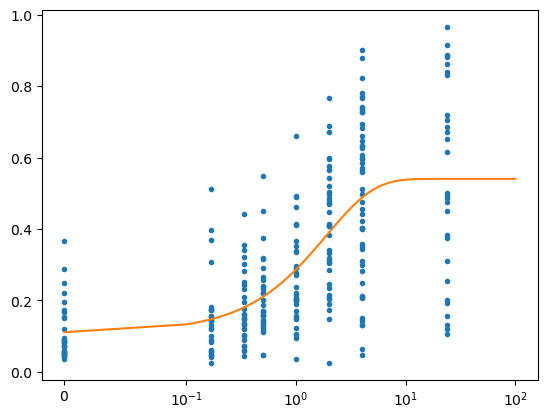

In [7]:
plt.plot(all_mRNA_Xs, all_mRNA_Ys, '.')
plt.xscale('symlog', linthresh=.1)
plt.plot(ts, exp_curve(ts, *popt1))

C:\Users\yitongma\AppData\Local\Temp\ipykernel_18264\913993055.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(incu_t) + 0.07) - 10**(np.log10(incu_t) - 0.07)


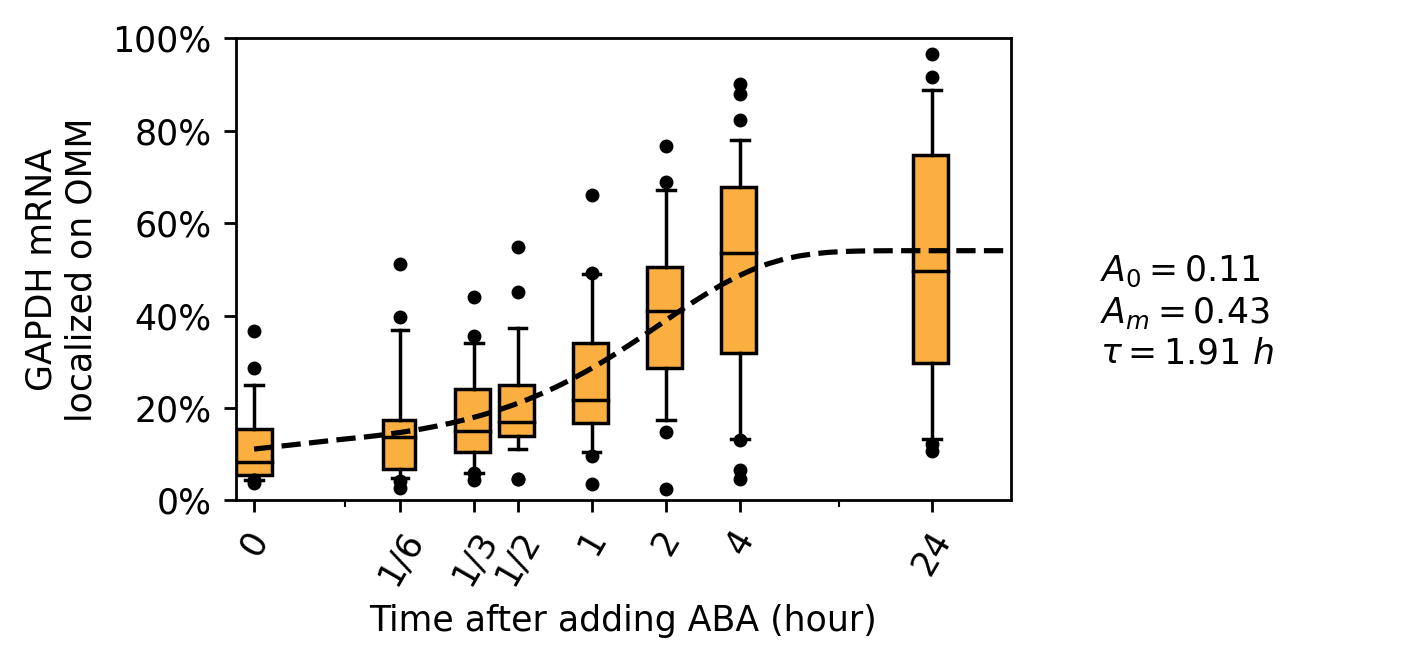

In [8]:
box_widths = 10**(np.log10(incu_t) + 0.07) - 10**(np.log10(incu_t) - 0.07)
box_widths[0:2] = [0.04, 0.05]

fig, ax = plot_box(incu_t, mRNA_fracs, box_widths, '#FAAF40', 'Time after adding ABA (hour)', 'GAPDH mRNA\nlocalized on OMM')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$ \\tau ={2:.2f}\ h$'.format(popt1[0], popt1[1], popt1[2]), 
            [1.1, 0.5], xycoords='figure fraction')

ax.plot(ts, exp_curve(ts, *popt1), 'k--')

fig.savefig('./mRNA_dynamics.pdf', bbox_inches="tight")

In [9]:
def exp_2_spe(t, A0, Am, tau, r, popt_slow):
    Y_slow = exp_curve(t, *popt_slow)
    return A0 + Am * (1 - r) * (1 - np.exp(-t / tau)) + r * Y_slow

In [10]:
exp_curve(0, *popt1)

0.11086133434355605

In [11]:
all_dCas_Xs = [[incu_t[idx]] * len(dCas13_fracs[idx]) for idx in range(len(dCas13_fracs))]
all_dCas_Xs = np.hstack(all_dCas_Xs)
all_dCas_Ys = np.hstack(dCas13_fracs)

popt2, popv2 = curve_fit(lambda t, A0, Am, tau, r : exp_2_spe(t, A0, Am, tau, r, popt1), 
                         all_dCas_Xs, all_dCas_Ys, [0, 1, 1, .5],
                         bounds=([0, 0, 0, 0], [1, 1, np.inf, 1]))
print(popt2)

[0.06362457 0.91280089 0.00602474 0.88923994]


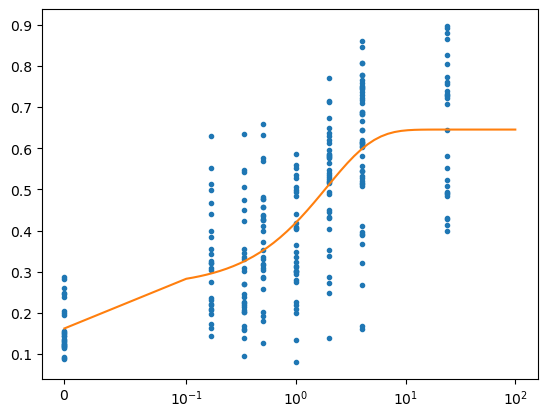

In [12]:
plt.plot(all_dCas_Xs, all_dCas_Ys, '.')
plt.xscale('symlog', linthresh=.1)
plt.plot(ts, exp_2_spe(ts, *popt2, popt1))

C:\Users\yitongma\AppData\Local\Temp\ipykernel_18264\4283565370.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(incu_t) + 0.07) - 10**(np.log10(incu_t) - 0.07)


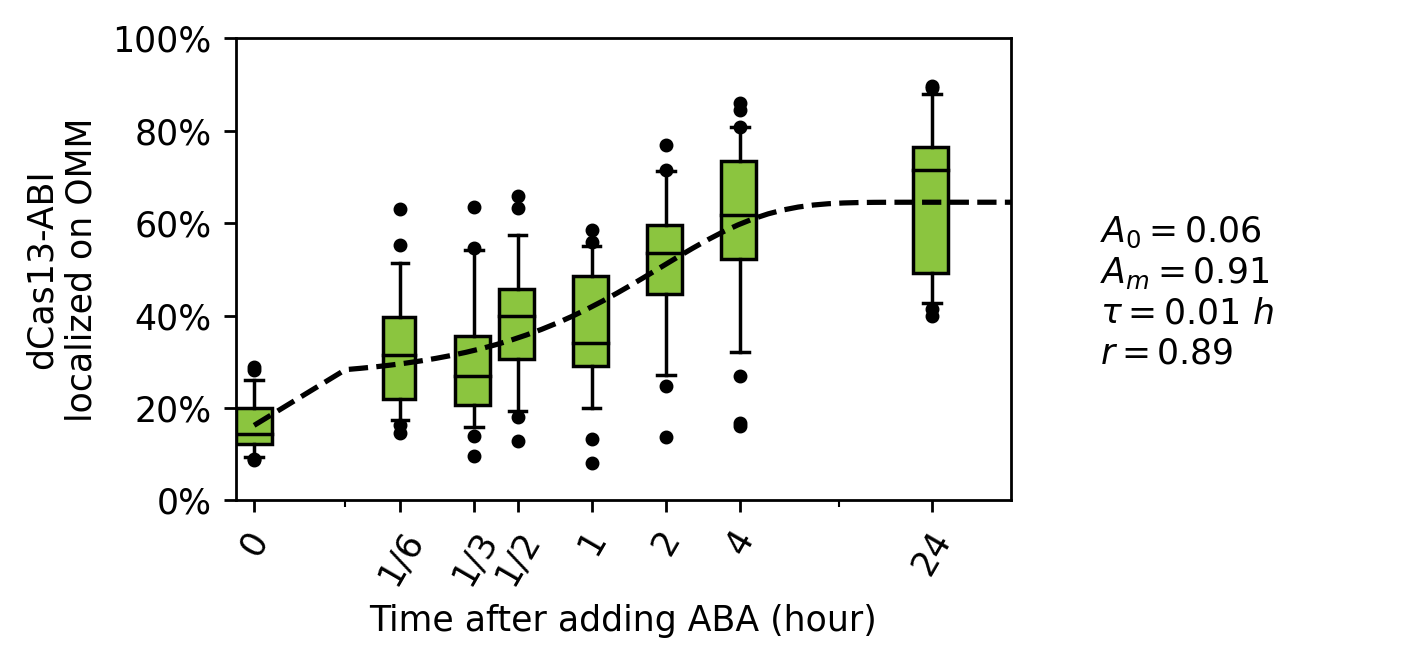

In [13]:
box_widths = 10**(np.log10(incu_t) + 0.07) - 10**(np.log10(incu_t) - 0.07)
box_widths[0:2] = [0.04, 0.05]

fig, ax = plot_box(incu_t, dCas13_fracs, box_widths, '#8BC53F', 'Time after adding ABA (hour)', 'dCas13-ABI\nlocalized on OMM')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$ \\tau ={2:.2f}\ h$ \n$r={3:.2f}$'.format(popt2[0], popt2[1], popt2[2], popt2[3]), 
            [1.1, 0.5], xycoords='figure fraction')

ax.plot(ts, exp_2_spe(ts, *popt2, popt1), 'k--')
fig.savefig('./dCas13_dynamics.pdf', bbox_inches="tight")

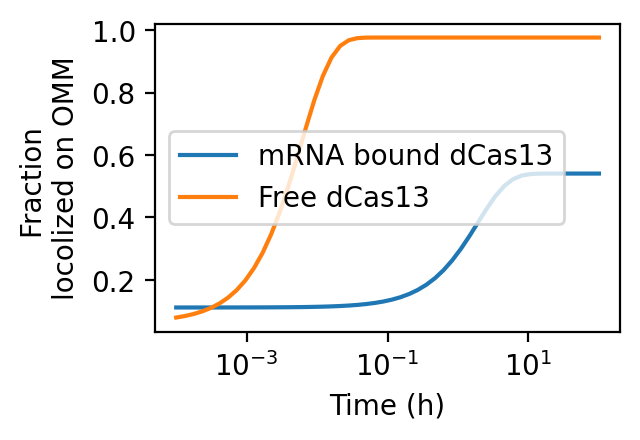

In [14]:
detailed_ts = np.logspace(-4, 2)
fig, ax = plt.subplots(figsize=[3, 2])
fig.dpi = 200
ax.plot(detailed_ts, exp_curve(detailed_ts, *popt1), label='mRNA bound dCas13')
ax.plot(detailed_ts, exp_curve(detailed_ts, *popt2[0:3]), label='Free dCas13')

ax.legend()
ax.set_xlabel('Time (h)')
ax.set_ylabel('Fraction \nlocolized on OMM')

ax.set_xscale('log')
fig.savefig('dynamics_pure_theory.pdf', bbox_inches="tight")

In [15]:
popt2[0:3]

array([0.06362457, 0.91280089, 0.00602474])

### For deasscociation dynamics 
$$
    Y = A_0 + A_m \cdot e^{- t / \tau} 
$$

$A_0$ is conctrained by the mean of DMSO sample

In [16]:
def exp_deaso(t, A0, Am, tau):
    return A0 + Am * np.exp(-t / tau)

In [17]:
conc_df = pd.read_excel('./2023-02-17_Quantification.xlsx', sheet_name='Summary_Release', skiprows=2, header=None)
ts2 = np.hstack([[0], np.logspace(-1, np.log10(3))])

deaso_t = [0, 1/6, 2/6, 3/6, 1, 2, 6]
deaso_t_labels = ['0', '1/6', '1/3', '1/2', '1', '2', 'DMSO\n(Inf)']


mRNA_deaso_fracs = []
for idx in range(1, 8):
    fracs = np.array(conc_df[idx])
    mRNA_deaso_fracs.append(fracs[~np.isnan(fracs)])


dCas13_deaso_fracs = []
for idx in range(10, 17):
    fracs = np.array(conc_df[idx])
    dCas13_deaso_fracs.append(fracs[~np.isnan(fracs)])


In [19]:
all_mRNA_deaso_Xs = [[deaso_t[idx]] * len(mRNA_deaso_fracs[idx]) for idx in range(len(mRNA_deaso_fracs) - 1)]
all_mRNA_deaso_Xs = np.hstack(all_mRNA_deaso_Xs)
all_mRNA_deaso_Ys = np.hstack(mRNA_deaso_fracs[0:-1])

A0_est1 = np.mean(mRNA_deaso_fracs[-1])
popt3, popv3 = curve_fit(lambda t, Am, tau: exp_deaso(t, A0_est1, Am, tau), all_mRNA_deaso_Xs, all_mRNA_deaso_Ys, [1, 1])

print(popt3)

[0.40447469 0.67744973]


C:\Users\yitongma\AppData\Local\Temp\ipykernel_18264\3887022443.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(deaso_t) + 0.07) - 10**(np.log10(deaso_t) - 0.07)


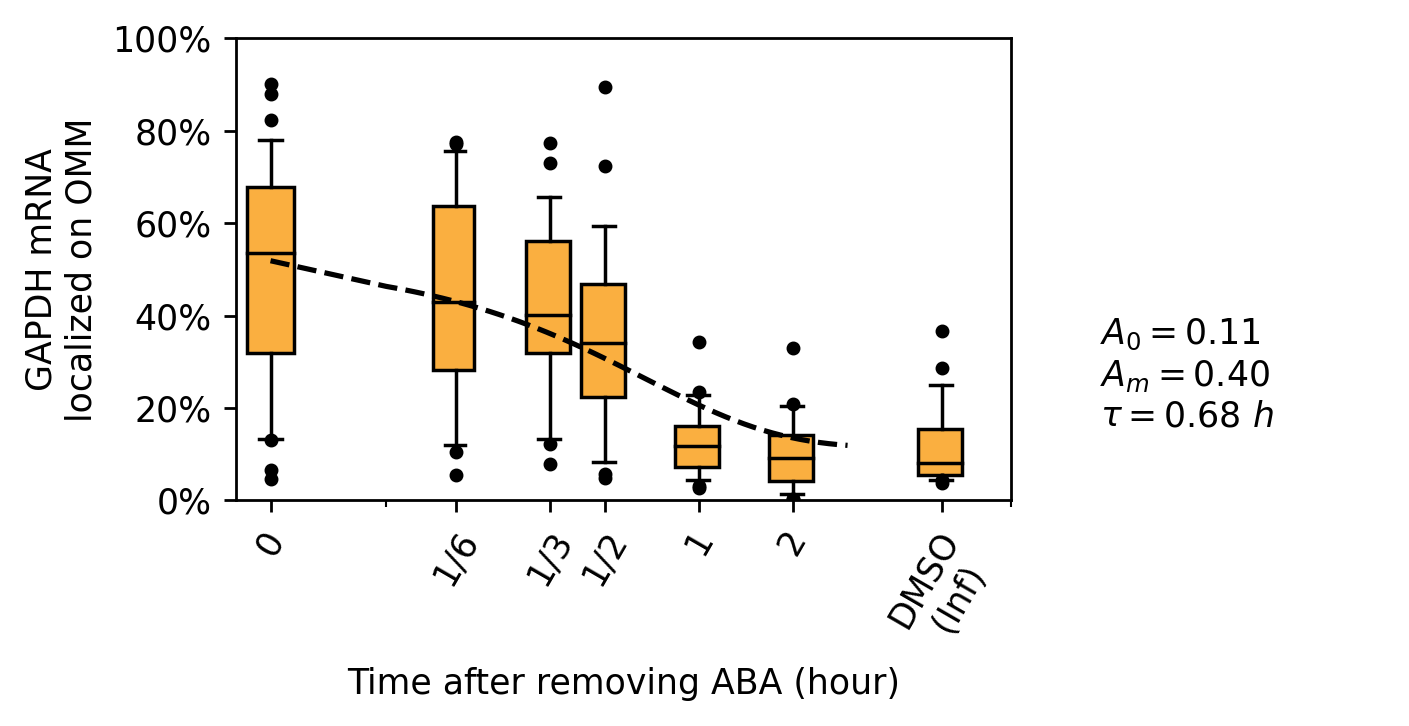

In [20]:
box_widths = 10**(np.log10(deaso_t) + 0.07) - 10**(np.log10(deaso_t) - 0.07)
box_widths[0:2] = [0.04, 0.05]

fig, ax = plot_box(deaso_t, mRNA_deaso_fracs, box_widths, '#FAAF40', 
                   'Time after removing ABA (hour)', 'GAPDH mRNA\nlocalized on OMM')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$ \\tau ={2:.2f}\ h$'.format(A0_est1, popt3[0], popt3[1]), 
            [1.1, 0.5], xycoords='figure fraction')

ax.set_xticks(deaso_t, labels=deaso_t_labels, rotation=60)
ax.set_xlim([-0.03, 10])

ax.plot(ts2, exp_deaso(ts2, A0_est1, *popt3), 'k--')

fig.savefig('./mRNA_dassociation_dynamics.pdf', bbox_inches="tight")

In [21]:
all_dCas_deaso_Xs = [[deaso_t[idx]] * len(dCas13_deaso_fracs[idx]) for idx in range(len(dCas13_deaso_fracs) - 1)]
all_dCas_deaso_Xs = np.hstack(all_dCas_deaso_Xs)
all_dCas_deaso_Ys = np.hstack(dCas13_deaso_fracs[0:-1])

A0_est2 = np.mean(dCas13_deaso_fracs[-1])
popt4, popv4 = curve_fit(lambda t, Am, tau: exp_deaso(t, A0_est2, Am, tau), all_dCas_deaso_Xs, all_dCas_deaso_Ys, [1, 1])

print(popt4)

[0.45596404 0.47019081]


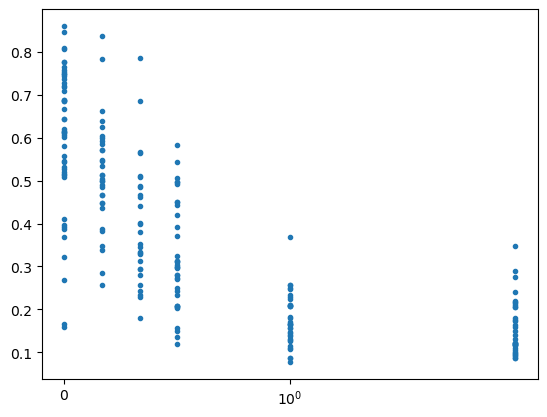

In [22]:
plt.plot(all_dCas_deaso_Xs, all_dCas_deaso_Ys, '.')
plt.xscale('symlog')

C:\Users\yitongma\AppData\Local\Temp\ipykernel_18264\3630845070.py:1: RuntimeWarning: divide by zero encountered in log10
  box_widths = 10**(np.log10(deaso_t) + 0.07) - 10**(np.log10(deaso_t) - 0.07)


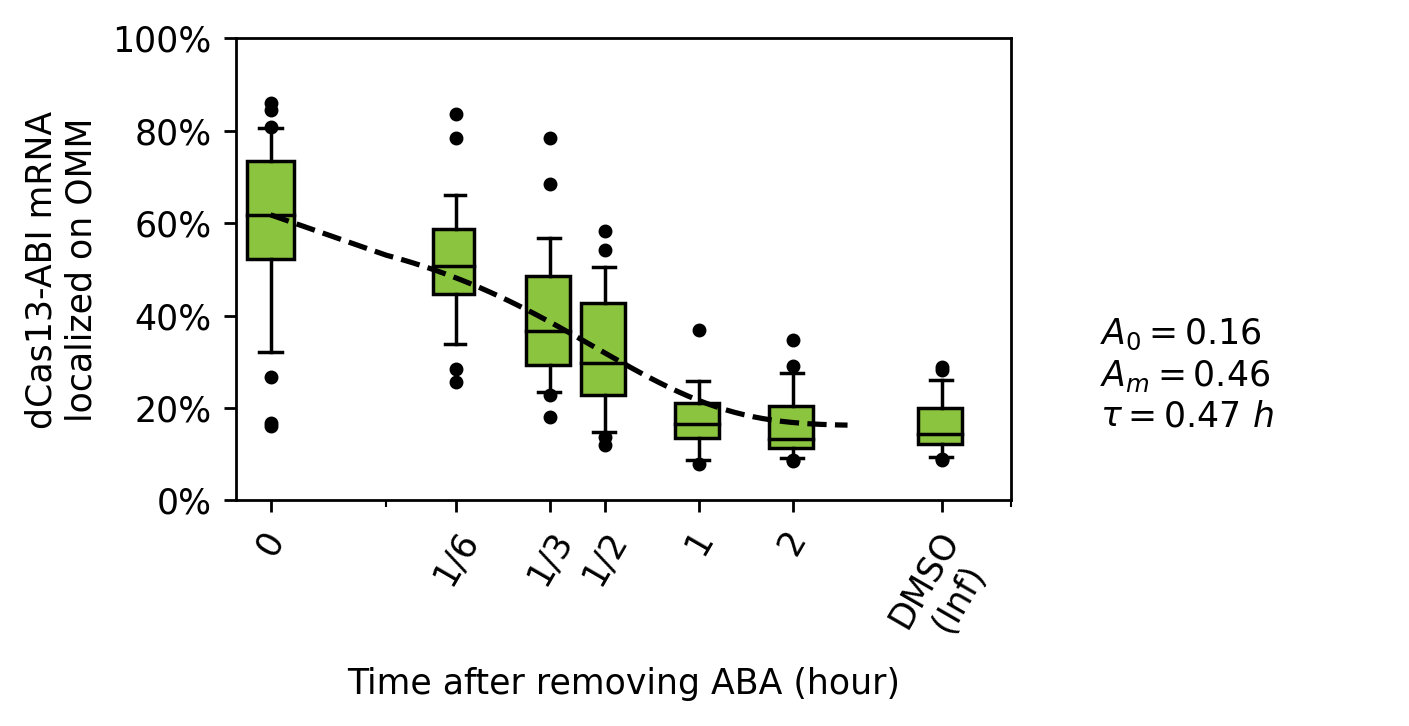

In [23]:
box_widths = 10**(np.log10(deaso_t) + 0.07) - 10**(np.log10(deaso_t) - 0.07)
box_widths[0:2] = [0.04, 0.05]

fig, ax = plot_box(deaso_t, dCas13_deaso_fracs, box_widths, '#8BC53F', 
                   'Time after removing ABA (hour)', 'dCas13-ABI mRNA\nlocalized on OMM')
ax.annotate('$A_0={0:.2f}$ \n$A_m={1:.2f}$ \n$ \\tau ={2:.2f}\ h$'.format(A0_est2, popt4[0], popt4[1]), 
            [1.1, 0.5], xycoords='figure fraction')

ax.set_xticks(deaso_t, labels=deaso_t_labels, rotation=60)
ax.set_xlim([-0.03, 10])

ax.plot(ts2, exp_deaso(ts2, A0_est2, *popt4), 'k--')

fig.savefig('./dCas13_dassociation_dynamics.pdf', bbox_inches="tight")

In [24]:
[[deaso_t[idx]] * len(dCas13_deaso_fracs[idx]) for idx in range(len(dCas13_deaso_fracs))]

[[0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 [0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666,
  0.16666666666666666],
 [0.33333333

In [39]:
dCas13_deaso_fracs

[]

In [60]:
ts2

array([ 0.        ,  0.1       ,  0.11304564,  0.12779318,  0.14446462,
        0.16331096,  0.18461593,  0.20870027,  0.23592657,  0.26670471,
        0.30149805,  0.34083042,  0.38529395,  0.43555802,  0.49237938,
        0.55661344,  0.62922725,  0.711314  ,  0.8041095 ,  0.90901077,
        1.02759709,  1.16165375,  1.31319897,  1.48451424,  1.6781787 ,
        1.89710793,  2.14459789,  2.42437451,  2.74064979,  3.09818523,
        3.50236346,  3.95926935,  4.47578157,  5.05967613,  5.7197435 ,
        6.46592091,  7.30944198,  8.26300581,  9.34096819, 10.55955771,
       11.93712009, 13.49439436, 15.2548251 , 17.24491539, 19.49462577,
       22.03782539, 24.91280179, 28.16283739, 31.83686109, 35.99018487,
       40.68533651])

In [61]:
np.log(5)

1.6094379124341003